In [73]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import wrangle

#set figure and font size
plt.rc('figure', figsize=(11, 9))

plt.rc('font', size=13)

#set seaborn color pallete
sns.set_palette('spring')
pal = sns.set_palette('spring')
print(sns.color_palette().as_hex())

['#ff24db', '#ff49b6', '#ff6d92', '#ff926d', '#ffb649', '#ffdb24']


# Regression Wrangle Exercises

## Exercises I

Let's review the steps we take at the beginning of each new module.

1. Create a new repository named `regression-exercises` in your GitHub; all of your Regression work will be housed here.
1. Clone this repository within your local `codeup-data-science` directory.
1. Create a `.gitignore` and make sure your list of 'files to ignore' includes your `env.py` file.
1. Ceate a `README.md` file that outlines the contents and purpose of your repository.
1. Add, commit, and push these two files.
1. Now you can add your `env.py` file to this repository to access the Codeup database server.
1. For these exercises, you will create `wrangle.ipynb` and `wrangle.py` files to hold necessary functions.
1. As always, add, commit, and push your work often.

## Exercises II

Let's set up an example scenario as perspective for our regression exercises using the Zillow dataset.

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the obervations from 2017.

In these exercises, you will complete the first step toward the above goal: acquire and prepare the necessary Zillow data from the zillow database in the Codeup database server.

## Acquire
- [x] Use MySQL to view database and create SQL function required to acquire data requested below.
- [X] Save SQL query and add to new_zillow_data function in wrangle.py
- [X] Create new_zillow_data function to acquire data from codeup DB using SQL query and credentials from my env file.
    - this function will return a df based on the given SQL query
- [x] Create function get_ zillow_data to acquire the zillow data and create a CSV
- [X] Do some basic univariate exploration of df.  More exploration will be done in Prepare.

### EXERCISE ONE: 
Acquire `bedroomcnt`, `bathroomcnt`, `calculatedfinishedsquarefeet`, `taxvaluedollarcnt`, `yearbuilt`, `taxamount`, and `fips` from the `zillow` database for all 'Single Family Residential' properties.

In [83]:
#code for this function can be found in my wrangle.py
wrangle.new_zillow_data()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
...,...,...,...,...,...,...,...
2152858,4.0,3.0,2262.0,960756.0,2015.0,13494.52,6059.0
2152859,4.0,4.5,3127.0,536061.0,2014.0,6244.16,6059.0
2152860,0.0,0.0,NaN,208057.0,NaN,5783.88,6059.0
2152861,3.0,2.5,1974.0,424353.0,2015.0,5302.70,6059.0


In [84]:
df = wrangle.get_zillow_data()

In [85]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [86]:
df.describe()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
count,2.152852e+06,2.152852e+06,2.144379e+06,2.152370e+06,2.143526e+06,2.148421e+06,2.152863e+06
mean,3.287196e+00,2.230688e+00,1.862855e+03,4.618962e+05,1.960950e+03,5.634866e+03,6.048377e+03
std,9.547544e-01,9.992796e-01,1.222125e+03,6.996760e+05,2.216220e+01,8.178910e+03,2.043329e+01
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.801000e+03,1.850000e+00,6.037000e+03
25%,3.000000e+00,2.000000e+00,1.257000e+03,1.881702e+05,1.949000e+03,2.534980e+03,6.037000e+03
50%,3.000000e+00,2.000000e+00,1.623000e+03,3.276710e+05,1.958000e+03,4.108950e+03,6.037000e+03
75%,4.000000e+00,3.000000e+00,2.208000e+03,5.345270e+05,1.976000e+03,6.414320e+03,6.059000e+03
max,2.500000e+01,3.200000e+01,9.525760e+05,9.842891e+07,2.016000e+03,1.337756e+06,6.111000e+03


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 131.4 MB


In [88]:
df.shape

(2152863, 7)

array([[<AxesSubplot:title={'center':'bedroomcnt'}>,
        <AxesSubplot:title={'center':'bathroomcnt'}>,
        <AxesSubplot:title={'center':'calculatedfinishedsquarefeet'}>],
       [<AxesSubplot:title={'center':'taxvaluedollarcnt'}>,
        <AxesSubplot:title={'center':'yearbuilt'}>,
        <AxesSubplot:title={'center':'taxamount'}>],
       [<AxesSubplot:title={'center':'fips'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

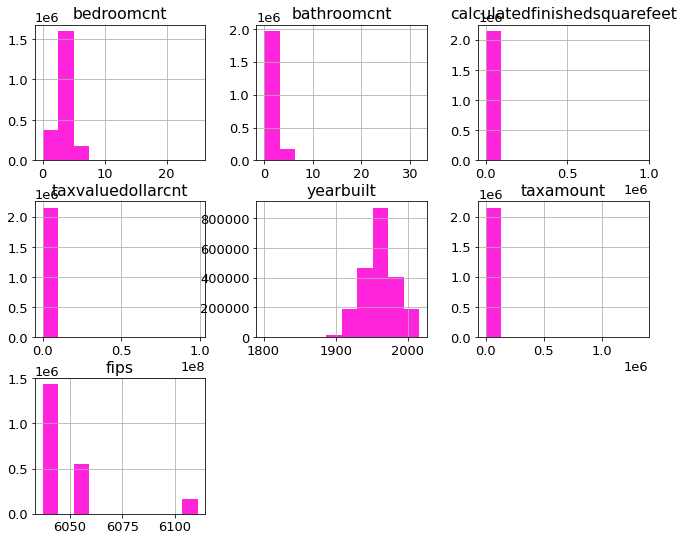

In [89]:
df.hist()

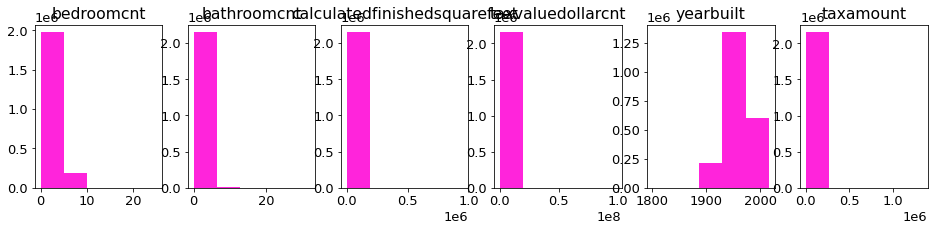

In [90]:
plt.figure(figsize=(16, 3))

# List of columns
cols = [col for col in df.columns if col not in ['fips', 'year_built']]

for i, col in enumerate(cols):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1, len(cols), plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    df[col].hist(bins=5)

    # Hide gridlines.
    plt.grid(False)
    
    # turn off scientific notation
    plt.ticklabel_format(useOffset=False)
    
plt.show()

KeyError: "None of [Index(['bedrooms'], dtype='object')] are in the [columns]"

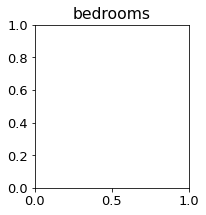

In [91]:
# List of columns
cols = ['bedrooms', 'bathrooms', 'square_feet', 'tax_value', 'taxamount']

plt.figure(figsize=(16, 3))

for i, col in enumerate(cols):

    # i starts at 0, but plot should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1, len(cols), plot_number)

    # Title with column name.
    plt.title(col)

    # Display boxplot for column.
    sns.boxplot(data=df[[col]])

    # Hide gridlines.
    plt.grid(False)

    # sets proper spacing between plots
    plt.tight_layout()
    
plt.show()

### Acquire Takeaways:
- There appear to be some serious outliers


2. Using your acquired Zillow data, walk through the summarization and cleaning steps in your `wrangle.ipynb` file like we did above. You may handle the missing values however you feel is appropriate and meaninful; remember to document your process and decisions using markdown and code commenting where helpful.

## Prepare
### Plan for Prepare:
- [] Store functions that are needed to prepare your data; make sure your module contains the necessary imports to run your code. Your final function should do the following:

- [] Split your data into train/validate/test.
- [] Handle Missing Values.
- [] Handle outliers
- [] Handle erroneous data and/or outliers you wish to address.
- []  Encode variables as needed.
- [] Create any new features, if you decided to make any for this project
- [] Create function to clean data and Split data

In [61]:
#rename columns
df = df.rename(columns = {'bedroomcnt': 'bedrooms', 
                           'bathroomcnt':'bathrooms',
                           'calculatedfinishedsquarefeet': 'square_feet',
                           'taxvaluedollarcnt':'tax_value',
                           'yearbuilt':'year_built'})
df.columns

Index(['bedrooms', 'bathrooms', 'square_feet', 'tax_value', 'year_built',
       'taxamount', 'fips'],
      dtype='object')

In [58]:
#remove outliers using remove_outliers function


In [46]:
#remove whitespace
df.applymap(lambda x: x.strip() if type(x)==str else x)

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
5,0.0,0.0,NaN,124.0,NaN,NaN,6037.0
...,...,...,...,...,...,...,...
2152856,4.0,4.0,4375.0,422400.0,2015.0,13877.56,6037.0
2152857,0.0,0.0,NaN,1087111.0,NaN,19313.08,6059.0
2152858,4.0,3.0,2262.0,960756.0,2015.0,13494.52,6059.0
2152859,4.0,4.5,3127.0,536061.0,2014.0,6244.16,6059.0


In [37]:
#drop duplicates just in case
#do we do this?
df = df.drop_duplicates()

In [39]:
df.shape

(2141219, 7)

In [47]:
df.isnull().sum()

bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    6932
taxvaluedollarcnt                126
yearbuilt                       7770
taxamount                       3351
fips                               0
dtype: int64

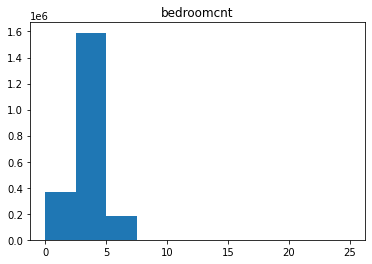

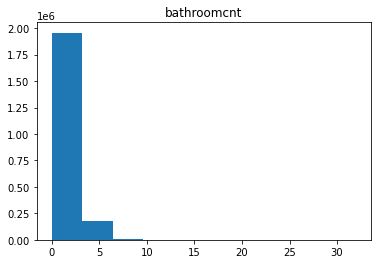

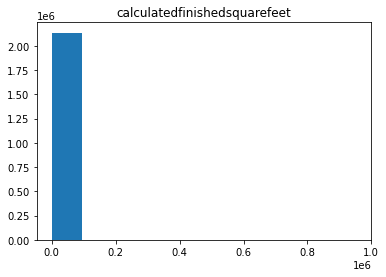

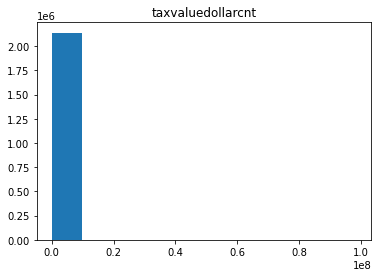

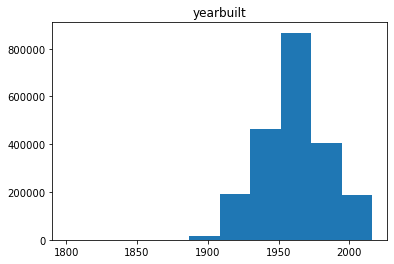

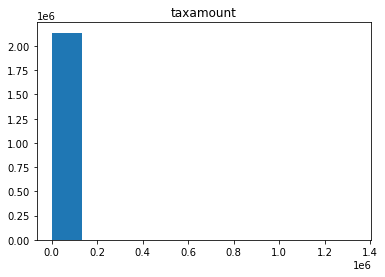

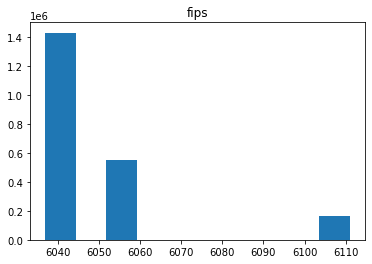

In [48]:
# plot distribution of numeric columns

# create a list of numeric column names

num_cols = df.select_dtypes(include = 'number').columns
num_cols

# loop through the list and plot a histogram for each numeric column
for col in num_cols:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

3.0     964298
4.0     634289
2.0     335473
5.0     150866
6.0      25166
1.0      23166
0.0      13187
7.0       4807
8.0       1107
9.0        291
10.0       121
11.0        34
13.0        16
12.0        12
14.0         7
15.0         6
18.0         3
16.0         2
25.0         1
Name: bedroomcnt, dtype: int64


3.0     4.479142e-01
4.0     2.946258e-01
2.0     1.558265e-01
5.0     7.007692e-02
6.0     1.168955e-02
1.0     1.076055e-02
0.0     6.125332e-03
7.0     2.232841e-03
8.0     5.141990e-04
9.0     1.351688e-04
10.0    5.620423e-05
11.0    1.579292e-05
13.0    7.431964e-06
12.0    5.573973e-06
NaN     5.109475e-06
14.0    3.251484e-06
15.0    2.786986e-06
18.0    1.393493e-06
16.0    9.289955e-07
25.0    4.644977e-07
Name: bedroomcnt, dtype: float64
---------------------------------

2.00     943589
3.00     422841
1.00     414324
2.50     142981
4.00      82155
1.50      31211
3.50      28518
5.00      28362
4.50      19506
0.00      13027
6.00      10747
5.50       6217
7.

In [27]:
df.bedroomcnt.mode()

0    3.0
dtype: float64

In [23]:
df.bedroomcnt.value_counts()

3.0     964298
4.0     634289
2.0     335473
5.0     150866
6.0      25166
1.0      23166
0.0      13187
7.0       4807
8.0       1107
9.0        291
10.0       121
11.0        34
13.0        16
12.0        12
14.0         7
15.0         6
18.0         3
16.0         2
25.0         1
Name: bedroomcnt, dtype: int64

In [28]:
df.bathroomcnt.mode()

0    2.0
dtype: float64

In [29]:
df.calculatedfinishedsquarefeet.mean()

1862.855177652831

In [30]:
df.calculatedfinishedsquarefeet.mode()

0    1200.0
dtype: float64

<AxesSubplot:>

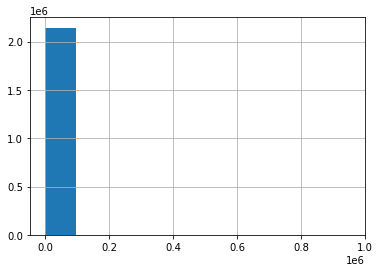

In [31]:
df.calculatedfinishedsquarefeet.

In [24]:
## Takeaways
- 11 bedroom count nulls can be replaced by the mode of 3
- 11 bathroom count nulls can be replaced with the mode of 3


3.287196240150275

3. Store all of the necessary functions to automate your process from acquiring the data to returning a cleaned dataframe witn no missing values in your `wrangle.py` file. Name your final function `wrangle_zillow`.